In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
snails = pd.read_excel('snail_size.xlsx', sheet_name='snail_size')

In [3]:
snails.describe()

length     diameter       height  full_weight  no_shell_weight  \
count  4163.000000  4163.000000  4177.000000  4177.000000      4177.000000   
mean      0.524042     0.407871     0.219368     0.828742         0.359367   
std       0.120100     0.099266     3.506068     0.490389         0.221963   
min       0.075000     0.055000     0.000000     0.002000         0.001000   
25%       0.450000     0.350000     0.115000     0.441500         0.186000   
50%       0.545000     0.425000     0.140000     0.799500         0.336000   
75%       0.615000     0.480000     0.165000     1.153000         0.502000   
max       0.815000     0.650000   165.000000     2.825500         1.488000   

       core_weight  shell_weight          age  
count  4177.000000   4147.000000  4177.000000  
mean      0.180594      0.239078     9.933684  
std       0.109614      0.139089     3.224169  
min       0.000500      0.001500     1.000000  
25%       0.093500      0.130000     8.000000  
50%       0.171000      0.235000     9.000000  
75%       0.253000      0.329750    11.000000  
max       0.760000      1.005000    29.000000

In [4]:
snails.head()

gender  length  diameter  height  full_weight  no_shell_weight  \
0       M   0.455     0.365   0.095       0.5140           0.2245   
1       M   0.350     0.265   0.090       0.2255           0.0995   
2       F   0.530     0.420   0.135       0.6770           0.2565   
3       M   0.440     0.365   0.125       0.5160           0.2155   
4  Infant   0.330     0.255   0.080       0.2050           0.0895   

   core_weight  shell_weight  age  
0       0.1010         0.150   15  
1       0.0485         0.070    7  
2       0.1415         0.210    9  
3       0.1140           NaN   10  
4       0.0395         0.055    7

In [5]:
snails.dtypes

gender              object
length             float64
diameter           float64
height             float64
full_weight        float64
no_shell_weight    float64
core_weight        float64
shell_weight       float64
age                  int64
dtype: object

<IPython.core.display.Javascript object>


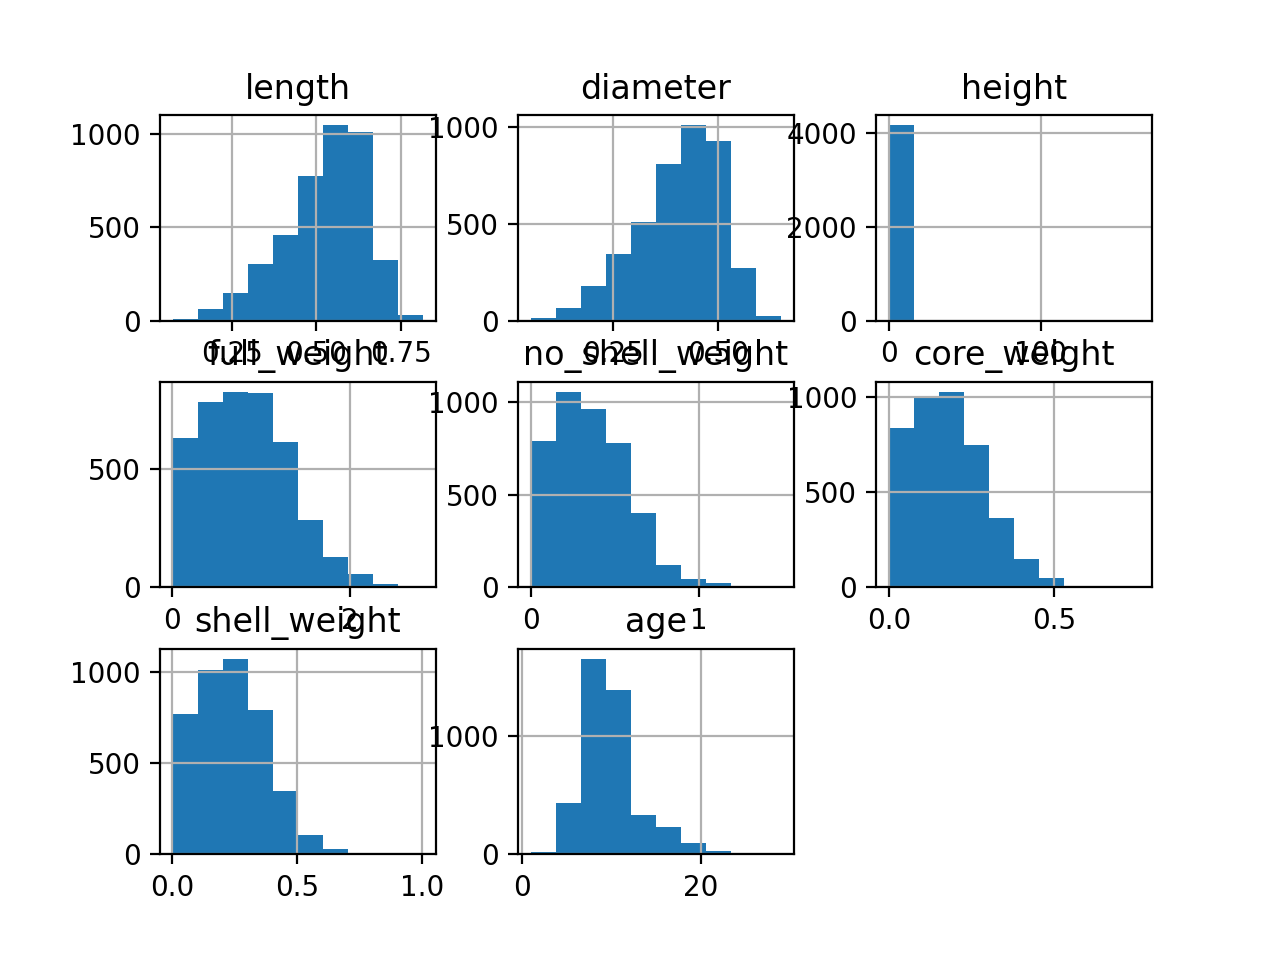

array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'full_weight'}>,
        <Axes: title={'center': 'no_shell_weight'}>,
        <Axes: title={'center': 'core_weight'}>],
       [<Axes: title={'center': 'shell_weight'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

In [6]:
snails.hist()

### Gender

Since `gender` contains categorical nominal data, we can encode this data numerically using label, or integer encoding, by simply swapping the string with a unique number:

In [7]:
snails['gender']

0            M
1            M
2            F
3            M
4       Infant
         ...  
4172         F
4173         M
4174         M
4175         F
4176         M
Name: gender, Length: 4177, dtype: object

In [8]:
snails['gender'].unique()

array(['M', 'F', 'Infant', 'Instant'], dtype=object)

In [9]:
snails['gender'] = snails['gender'].str.replace('M', '0')

In [10]:
snails['gender'] = snails['gender'].str.replace('F', '1')

In [11]:
snails['gender'] = snails['gender'].str.replace('Infant', '2')

In [12]:
snails['gender'] = snails['gender'].str.replace('Instant', '3')

In [13]:
snails['gender'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [14]:
snails['gender']

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: gender, Length: 4177, dtype: object

In [15]:
snails['gender'] = pd.to_numeric(snails['gender'], errors='coerce')

In [16]:
snails['gender'].unique()

array([0, 1, 2, 3])

In [17]:
snails['gender'].dtypes

dtype('int64')

### Length

For `length`, the value count is 4,163 - which is less than the row count of 4,177. This means that there are likely missing values. We'll replace the NaN values with the median value for that row, to complete the series:

In [18]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4177.000000  4163.000000  4163.000000  4177.000000  4177.000000   
mean      0.957146     0.524042     0.407871     0.219368     0.828742   
std       0.830935     0.120100     0.099266     3.506068     0.490389   
min       0.000000     0.075000     0.055000     0.000000     0.002000   
25%       0.000000     0.450000     0.350000     0.115000     0.441500   
50%       1.000000     0.545000     0.425000     0.140000     0.799500   
75%       2.000000     0.615000     0.480000     0.165000     1.153000   
max       3.000000     0.815000     0.650000   165.000000     2.825500   

       no_shell_weight  core_weight  shell_weight          age  
count      4177.000000  4177.000000   4147.000000  4177.000000  
mean          0.359367     0.180594      0.239078     9.933684  
std           0.221963     0.109614      0.139089     3.224169  
min           0.001000     0.000500      0.001500     1.000000  
25%           0.186000     0.093500      0.130000     8.000000  
50%           0.336000     0.171000      0.235000     9.000000  
75%           0.502000     0.253000      0.329750    11.000000  
max           1.488000     0.760000      1.005000    29.000000

In [19]:
snails.loc[snails['length'].isna()]

gender  length  diameter  height  full_weight  no_shell_weight  \
1925       1     NaN     0.470   0.165       1.1785           0.5660   
1964       1     NaN     0.535   0.205       1.4415           0.5925   
2003       2     NaN     0.280   0.080       0.2260           0.1050   
2042       2     NaN     0.280   0.100       0.2755           0.1305   
2081       0     NaN     0.500   0.140       1.2380           0.6165   
2120       0     NaN     0.325   0.100       0.3295           0.1365   
2159       1     NaN     0.510   0.200       1.3905           0.6100   
2198       2     NaN     0.190   0.080       0.0810           0.0265   
2237       0     NaN     0.465   0.190       1.1710           0.3905   
3097       0     NaN     0.435   0.145       0.9385           0.3685   
3175       2     NaN     0.405   0.120       0.6100           0.2290   
3214       1     NaN     0.495   0.160       1.0915           0.4520   
3331       1     NaN     0.340   0.180       0.7005           0.3120   
3409       3     NaN     0.310   0.095       0.3130           0.1310   

      core_weight  shell_weight  age  
1925       0.2785        0.2940   11  
1964       0.2775        0.4900   10  
2003       0.0470        0.0650    6  
2042       0.0610        0.0725    8  
2081       0.2355        0.3200    8  
2120       0.0725        0.1100    7  
2159       0.3315        0.4100   12  
2198       0.0195        0.0300    6  
2237       0.2355        0.4000   17  
3097       0.1245        0.3450   11  
3175       0.1310        0.2350   11  
3214       0.2750        0.3150   14  
3331       0.1650        0.2000   11  
3409       0.0720        0.0930    7

In [20]:
snails.loc[snails['length'].isna()] = snails['length'].median()

In [21]:
snails.loc[snails['length'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

In [22]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4177.000000  4177.000000  4163.000000  4177.000000  4177.000000   
mean      0.955142     0.524112     0.408373     0.220725     0.827939   
std       0.829516     0.119905     0.099400     3.506115     0.489934   
min       0.000000     0.075000     0.055000     0.000000     0.002000   
25%       0.000000     0.450000     0.350000     0.115000     0.443000   
50%       1.000000     0.545000     0.425000     0.140000     0.796500   
75%       2.000000     0.615000     0.480000     0.165000     1.151000   
max       3.000000     0.815000     0.650000   165.000000     2.825500   

       no_shell_weight  core_weight  shell_weight          age  
count      4177.000000  4177.000000   4147.000000  4177.000000  
mean          0.360077     0.181863      0.240103     9.902234  
std           0.221907     0.111465      0.139971     3.264726  
min           0.001000     0.000500      0.001500     0.545000  
25%           0.186500     0.093500      0.130000     8.000000  
50%           0.336500     0.171000      0.235000     9.000000  
75%           0.504500     0.254000      0.330000    11.000000  
max           1.488000     0.760000      1.005000    29.000000

Now that this is done, we should look for outliers. If there are any values which are +/- 3 Standard Deviations above the mean, we should remove the rows:

In [23]:
snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
236      2.0   0.075     0.055   0.010       0.0020           0.0010   
237      2.0   0.130     0.100   0.030       0.0130           0.0045   
238      2.0   0.110     0.090   0.030       0.0080           0.0025   
239      2.0   0.160     0.120   0.035       0.0210           0.0075   
526      0.0   0.155     0.110   0.040       0.0155           0.0065   
696      2.0   0.155     0.105   0.050       0.0175           0.0050   
719      2.0   0.150     0.100   0.025       0.0150           0.0045   
720      2.0   0.160     0.110   0.025       0.0180           0.0065   
1429     2.0   0.140     0.105   0.035       0.0140           0.0055   
1986     2.0   0.135     0.130   0.040       0.0290           0.0125   
1987     2.0   0.160     0.110   0.025       0.0195           0.0075   
2114     2.0   0.130     0.095   0.035       0.0105           0.0050   
2381     0.0   0.155     0.115   0.025       0.0240           0.0090   
3899     2.0   0.140     0.105   0.035       0.0145           0.0050   
3902     2.0   0.160     0.120   0.020       0.0180           0.0075   

      core_weight  shell_weight  age  
236        0.0005        0.0015  1.0  
237        0.0030           NaN  3.0  
238        0.0020        0.0030  3.0  
239        0.0045        0.0050  5.0  
526        0.0030        0.0050  3.0  
696        0.0035        0.0050  4.0  
719        0.0040        0.0050  2.0  
720        0.0055        0.0050  3.0  
1429       0.0025        0.0040  3.0  
1986       0.0065        0.0080  4.0  
1987       0.0050        0.0060  4.0  
2114       0.0065        0.0035  4.0  
2381       0.0050        0.0075  5.0  
3899       0.0035        0.0050  4.0  
3902       0.0045        0.0050  4.0

In [24]:
snails.drop(snails[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))].index, inplace=True)

In [25]:
snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
149      2.0   0.170     0.130   0.095       0.0300           0.0130   
306      2.0   0.165     0.120   0.030       0.0215           0.0070   
694      2.0   0.165     0.110   0.020       0.0190           0.0065   
2169     2.0   0.165     0.115   0.015       0.0145           0.0055   
2343     2.0   0.170     0.125   0.055       0.0235           0.0090   
3318     0.0   0.165     0.125   0.040       0.0245           0.0095   
3472     2.0   0.165     0.120   0.050       0.0210           0.0075   
3837     2.0   0.170     0.105   0.035       0.0340           0.0120   

      core_weight  shell_weight  age  
149        0.0080         0.010  4.0  
306        0.0050         0.005  3.0  
694        0.0025         0.005  4.0  
2169       0.0030         0.005  4.0  
2343       0.0055         0.008  6.0  
3318       0.0045         0.008  4.0  
3472       0.0045         0.014  3.0  
3837       0.0085         0.005  4.0

Because we removed such impactful outliers, the median changed - let's remove the new outliers:

In [26]:
snails.drop(snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))].index, inplace=True)

In [27]:
snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
148      2.0   0.175     0.130   0.055       0.0315           0.0105   
465      2.0   0.175     0.125   0.050       0.0235           0.0080   
525      0.0   0.175     0.125   0.040       0.0240           0.0095   
2380     0.0   0.175     0.135   0.040       0.0305           0.0110   
3600     2.0   0.175     0.125   0.040       0.0280           0.0095   

      core_weight  shell_weight  age  
148        0.0065        0.0125  5.0  
465        0.0035        0.0080  5.0  
525        0.0060        0.0050  4.0  
2380       0.0075        0.0100  5.0  
3600       0.0080        0.0090  4.0

In [28]:
snails.drop(snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))].index, inplace=True)

In [29]:
snails.loc[(snails['length'] < (snails['length'].mean() - (snails['length'].std() * 3))) | (snails['length'] > (snails['length'].mean() + (snails['length'].std() * 3)))]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

Looks like we got them all!

### Diameter

In [30]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4149.000000  4149.000000  4135.000000  4149.000000  4149.000000   
mean      0.950501     0.526606     0.410374     0.221968     0.833390   
std       0.827990     0.116372     0.096696     3.517895     0.487054   
min       0.000000     0.180000     0.120000     0.000000     0.023000   
25%       0.000000     0.455000     0.350000     0.115000     0.449000   
50%       1.000000     0.545000     0.425000     0.145000     0.802500   
75%       2.000000     0.615000     0.480000     0.165000     1.154000   
max       3.000000     0.815000     0.650000   165.000000     2.825500   

       no_shell_weight  core_weight  shell_weight          age  
count      4149.000000  4149.000000   4120.000000  4149.000000  
mean          0.362457     0.183059      0.241634     9.943271  
std           0.220748     0.110883      0.139140     3.236097  
min           0.008500     0.000500      0.006500     0.545000  
25%           0.189500     0.095000      0.132500     8.000000  
50%           0.339500     0.171500      0.235000     9.000000  
75%           0.506000     0.255000      0.330000    11.000000  
max           1.488000     0.760000      1.005000    29.000000

The `diameter` row count is below the total row count, so we should look for NaN values:

In [31]:
snails.loc[snails['diameter'].isna()]

gender  length  diameter  height  full_weight  no_shell_weight  \
1184     2.0   0.665       NaN   0.170       1.2975           0.6035   
1223     2.0   0.340       NaN   0.090       0.1790           0.0775   
1262     2.0   0.455       NaN   0.105       0.4005           0.1640   
1301     2.0   0.535       NaN   0.135       0.6025           0.2895   
1340     0.0   0.585       NaN   0.155       0.9145           0.4555   
1379     1.0   0.620       NaN   0.160       1.1295           0.4630   
1418     0.0   0.705       NaN   0.215       2.1410           1.0465   
1457     1.0   0.475       NaN   0.115       0.5660           0.2810   
1496     0.0   0.620       NaN   0.165       1.0725           0.4815   
1535     2.0   0.305       NaN   0.090       0.1465           0.0630   
1574     0.0   0.480       NaN   0.160       0.4640           0.2210   
1613     2.0   0.550       NaN   0.135       0.8160           0.3995   
1652     0.0   0.595       NaN   0.140       0.8380           0.3965   
1691     2.0   0.625       NaN   0.155       1.1955           0.6430   

      core_weight  shell_weight   age  
1184       0.2910        0.3595   9.0  
1223       0.0330        0.0550   6.0  
1262       0.0755        0.1260   8.0  
1301       0.1210        0.1540   9.0  
1340       0.1965        0.2350   9.0  
1379       0.2685        0.3300  10.0  
1418       0.3830        0.5280  11.0  
1457       0.1170        0.1335   7.0  
1496       0.2350        0.3120   9.0  
1535       0.0340        0.0415   6.0  
1574       0.1060        0.2390   8.0  
1613       0.1485        0.2300  12.0  
1652       0.1940        0.2170  10.0  
1691       0.2055        0.3145  12.0

In [32]:
snails.loc[snails['diameter'].isna()] = snails['diameter'].median()

In [33]:
snails.loc[snails['diameter'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

If we look for outliers, we'll see that there are only three, so let's remove them:

In [34]:
snails.loc[(snails['diameter'] < (snails['diameter'].mean() - (snails['diameter'].std() * 3))) | (snails['diameter'] > (snails['diameter'].mean() + (snails['diameter'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
898     2.0    0.28      0.12   0.075        0.117           0.0455   

     core_weight  shell_weight  age  
898        0.029        0.0345  4.0

In [35]:
snails.drop(snails[(snails['diameter'] < (snails['diameter'].mean() - (snails['diameter'].std() * 3))) | (snails['diameter'] > (snails['diameter'].mean() + (snails['diameter'].std() * 3)))].index, inplace=True)

In [36]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4148.000000  4148.000000  4148.000000  4148.000000  4148.000000   
mean      0.947825     0.526279     0.410493     0.222958     0.832162   
std       0.826706     0.116285     0.096442     3.518335     0.486681   
min       0.000000     0.180000     0.125000     0.000000     0.023000   
25%       0.000000     0.450000     0.350000     0.115000     0.447000   
50%       1.000000     0.545000     0.425000     0.145000     0.799500   
75%       2.000000     0.615000     0.480000     0.165000     1.153000   
max       3.000000     0.815000     0.650000   165.000000     2.825500   

       no_shell_weight  core_weight  shell_weight          age  
count      4148.000000   4148.00000   4119.000000  4148.000000  
mean          0.362621      0.18395      0.242334     9.915762  
std           0.220268      0.11161      0.139334     3.279764  
min           0.008500      0.00050      0.006500     0.425000  
25%           0.190000      0.09550      0.133250     8.000000  
50%           0.341000      0.17225      0.235000     9.000000  
75%           0.505500      0.25600      0.331250    11.000000  
max           1.488000      0.76000      1.005000    29.000000

### Height

Although the value count for `height` is equal to the row count, it's still worth checking for null values:

In [37]:
snails.loc[snails['height'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

This looks good. Now, let's check for outliers:

In [38]:
snails.loc[(snails['height'] < (snails['height'].mean() - (snails['height'].std() * 3))) | (snails['height'] > (snails['height'].mean() + (snails['height'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
10       1.0   0.525     0.380    14.0       0.6065           0.1940   
557      1.0   0.660     0.500   165.0       1.1905           0.4585   
1495     1.0   0.620     0.435   155.0       1.0120           0.4770   

      core_weight  shell_weight   age  
10         0.1475         0.210  14.0  
557        0.2980         0.370  12.0  
1495       0.2360         0.275   8.0

The two highest outliers might be typo's, but we should remove all three just in case:

In [39]:
snails.drop(snails[(snails['height'] < (snails['height'].mean() - (snails['height'].std() * 3))) | (snails['height'] > (snails['height'].mean() + (snails['height'].std() * 3)))].index, inplace=True)

In [40]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4145.000000  4145.000000  4145.000000  4145.000000  4145.000000   
mean      0.947788     0.526224     0.410473     0.142540     0.832086   
std       0.827004     0.116299     0.096465     0.050003     0.486805   
min       0.000000     0.180000     0.125000     0.000000     0.023000   
25%       0.000000     0.450000     0.350000     0.115000     0.447000   
50%       1.000000     0.545000     0.425000     0.145000     0.799500   
75%       2.000000     0.615000     0.480000     0.165000     1.153000   
max       3.000000     0.815000     0.650000     1.130000     2.825500   

       no_shell_weight  core_weight  shell_weight          age  
count      4145.000000  4145.000000   4116.000000  4145.000000  
mean          0.362611     0.183918      0.242303     9.914736  
std           0.220320     0.111632      0.139369     3.280042  
min           0.008500     0.000500      0.006500     0.425000  
25%           0.190000     0.095500      0.132875     8.000000  
50%           0.341000     0.172000      0.235000     9.000000  
75%           0.505500     0.256000      0.331125    11.000000  
max           1.488000     0.760000      1.005000    29.000000

### Full Weight

Although the value count for `full_weight` is equal to the row count, we will still check for null values:

In [41]:
snails.loc[snails['full_weight'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

Looks like all the values are accounted for, but after a cursory look at the standard deviation, min, and max for this column, there are likely a great deal of outliers - let's remove them as well:

In [42]:
snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
165      0.0   0.725     0.570   0.190       2.5500           1.0705   
358      0.0   0.745     0.585   0.215       2.4990           0.9265   
891      0.0   0.730     0.595   0.230       2.8255           1.1465   
1051     1.0   0.735     0.600   0.220       2.5550           1.1335   
1052     0.0   0.765     0.600   0.220       2.3020           1.0070   
1207     1.0   0.755     0.625   0.210       2.5050           1.1965   
1209     1.0   0.780     0.630   0.215       2.6570           1.4880   
1427     1.0   0.750     0.610   0.235       2.5085           1.2320   
1762     0.0   0.770     0.620   0.195       2.5155           1.1155   
1763     0.0   0.775     0.630   0.250       2.7795           1.3485   
2334     1.0   0.800     0.630   0.195       2.5260           0.9330   
2623     1.0   0.705     0.560   0.205       2.3810           0.9915   
2624     0.0   0.765     0.585   0.180       2.3980           1.1280   
2811     0.0   0.725     0.570   0.190       2.3305           1.2530   
2863     0.0   0.740     0.595   0.190       2.3235           1.1495   
3427     0.0   0.740     0.605   0.200       2.4925           1.1455   
3599     0.0   0.735     0.555   0.220       2.3330           1.2395   
3715     0.0   0.780     0.600   0.210       2.5480           1.1945   
3800     0.0   0.740     0.580   0.205       2.3810           0.8155   

      core_weight  shell_weight   age  
165        0.4830        0.7250  14.0  
358        0.4720        0.7000  17.0  
891        0.4190        0.8970  17.0  
1051       0.4400        0.6000  11.0  
1052       0.5090        0.6205  12.0  
1207       0.5130        0.6785  11.0  
1209       0.4985        0.5860  11.0  
1427       0.5190        0.6120  14.0  
1762       0.6415        0.6420  12.0  
1763       0.7600        0.5780  12.0  
2334       0.5900        0.6200  23.0  
2623       0.5005        0.6240  10.0  
2624       0.5120        0.5335  12.0  
2811       0.5410        0.5200   9.0  
2863       0.5115        0.5050  11.0  
3427       0.5750        0.5235  13.0  
3599       0.3645        0.6195  12.0  
3715       0.5745        0.6745  11.0  
3800       0.4695        0.4880  12.0

In [43]:
snails.drop(snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))].index, inplace=True)

In [44]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4126.000000  4126.000000  4126.000000  4126.000000  4126.000000   
mean      0.950698     0.525191     0.409613     0.142233     0.824427   
std       0.827189     0.115553     0.095837     0.049898     0.474529   
min       0.000000     0.180000     0.125000     0.000000     0.023000   
25%       0.000000     0.450000     0.350000     0.115000     0.444625   
50%       1.000000     0.545000     0.425000     0.145000     0.795750   
75%       2.000000     0.615000     0.480000     0.165000     1.146000   
max       3.000000     0.815000     0.650000     1.130000     2.273000   

       no_shell_weight  core_weight  shell_weight          age  
count      4126.000000  4126.000000   4097.000000  4126.000000  
mean          0.359067     0.182368      0.240559     9.901255  
std           0.214280     0.109372      0.137170     3.274728  
min           0.008500     0.000500      0.006500     0.425000  
25%           0.189500     0.095000      0.132500     8.000000  
50%           0.339250     0.171500      0.235000     9.000000  
75%           0.502000     0.254375      0.330000    11.000000  
max           1.351000     0.564000      1.005000    29.000000

In [45]:
snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
1193     0.0   0.700     0.575   0.190       2.2730           1.0950   
1426     1.0   0.745     0.570   0.215       2.2500           1.1565   
1428     1.0   0.815     0.650   0.250       2.2550           0.8905   
3008     1.0   0.750     0.615   0.205       2.2635           0.8210   
3188     0.0   0.720     0.575   0.230       2.2695           0.8835   

      core_weight  shell_weight   age  
1193       0.4180        0.6380  12.0  
1426       0.4460        0.5580   9.0  
1428       0.4200        0.7975  14.0  
3008       0.4230        0.7260  12.0  
3188       0.3985        0.6650  16.0

Just like with `length` above, we have new outliers - let's remove them now:

In [46]:
snails.drop(snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))].index, inplace=True)

In [47]:
snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

In [48]:
snails.drop(snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))].index, inplace=True)

In [49]:
snails.loc[(snails['full_weight'] < (snails['full_weight'].mean() - (snails['full_weight'].std() * 3))) | (snails['full_weight'] > (snails['full_weight'].mean() + (snails['full_weight'].std() * 3)))]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

# No Shell Weight

In [50]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4121.000000  4121.000000  4121.000000  4121.000000  4121.000000   
mean      0.951124     0.524924     0.409386     0.142141     0.822683   
std       0.827425     0.115359     0.095667     0.049853     0.472164   
min       0.000000     0.180000     0.125000     0.000000     0.023000   
25%       0.000000     0.450000     0.350000     0.115000     0.444500   
50%       1.000000     0.545000     0.425000     0.140000     0.795500   
75%       2.000000     0.615000     0.480000     0.165000     1.145000   
max       3.000000     0.775000     0.605000     1.130000     2.238500   

       no_shell_weight  core_weight  shell_weight          age  
count      4121.000000  4121.000000   4092.000000  4121.000000  
mean          0.358326     0.182078      0.240026     9.897981  
std           0.213303     0.109120      0.136373     3.274356  
min           0.008500     0.000500      0.006500     0.425000  
25%           0.189500     0.095000      0.132375     8.000000  
50%           0.339000     0.171500      0.235000     9.000000  
75%           0.501500     0.254000      0.330000    11.000000  
max           1.351000     0.564000      1.005000    29.000000

In [51]:
snails.loc[snails['no_shell_weight'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

Looks like all values are accounted for, let's check for outliers:

In [52]:
snails.loc[(snails['no_shell_weight'] < (snails['no_shell_weight'].mean() - (snails['no_shell_weight'].std() * 3))) | (snails['no_shell_weight'] > (snails['no_shell_weight'].mean() + (snails['no_shell_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
1048     0.0   0.710     0.565   0.205       2.1980           1.0120   
1197     0.0   0.715     0.550   0.190       2.0045           1.0465   
1199     1.0   0.720     0.580   0.195       2.1030           1.0265   
1202     0.0   0.725     0.505   0.185       1.9780           1.0260   
1206     1.0   0.750     0.570   0.210       2.2360           1.1090   
1417     0.0   0.705     0.565   0.515       2.2100           1.1075   
1527     0.0   0.720     0.565   0.200       2.1055           1.0170   
1528     0.0   0.725     0.575   0.240       2.2100           1.3510   
1754     0.0   0.720     0.550   0.205       2.1250           1.1455   
1756     1.0   0.725     0.565   0.210       2.1425           1.0300   
1761     0.0   0.750     0.595   0.205       2.2205           1.0830   
1821     1.0   0.720     0.550   0.195       2.0730           1.0715   
1982     0.0   0.720     0.565   0.190       2.0810           1.0815   
2544     1.0   0.730     0.570   0.165       2.0165           1.0685   
2625     0.0   0.770     0.600   0.215       2.1945           1.0515   
2675     0.0   0.600     0.490   0.210       1.9875           1.0050   
2710     0.0   0.750     0.555   0.215       2.2010           1.0615   
2810     0.0   0.720     0.550   0.205       2.1650           1.1055   
2862     0.0   0.735     0.570   0.210       2.2355           1.1705   
3007     0.0   0.730     0.585   0.225       2.2305           1.2395   
3082     1.0   0.755     0.575   0.200       2.0730           1.0135   
3713     0.0   0.710     0.555   0.175       2.1400           1.2455   
3961     0.0   0.695     0.550   0.205       2.1730           1.1330   
3962     1.0   0.720     0.575   0.195       2.1505           1.0745   

      core_weight  shell_weight   age  
1048       0.5225        0.5475  11.0  
1197       0.4070        0.5075  12.0  
1199       0.4800        0.5375  10.0  
1202       0.4255        0.4505  12.0  
1206       0.5195        0.5450  11.0  
1417       0.4865        0.5120  10.0  
1527       0.3630        0.4940  12.0  
1528       0.4130        0.5015  13.0  
1754       0.4425        0.5110  13.0  
1756       0.4870        0.5030  14.0  
1761       0.4210        0.6300  12.0  
1821       0.4265        0.5015   9.0  
1982       0.4305        0.5030  11.0  
2544       0.4180        0.4350  10.0  
2625       0.4820        0.5840  10.0  
2675       0.4190        0.4910  10.0  
2710       0.5235        0.5285  11.0  
2810       0.5250        0.4040  10.0  
2862       0.4630        0.5315  10.0  
3007       0.4220        0.5630  14.0  
3082       0.4655        0.4800  11.0  
3713       0.3725        0.4340  11.0  
3961       0.4665        0.4960  10.0  
3962       0.3820        0.5850  10.0

In [53]:
snails.drop(snails.loc[(snails['no_shell_weight'] < (snails['no_shell_weight'].mean() - (snails['no_shell_weight'].std() * 3))) | (snails['no_shell_weight'] > (snails['no_shell_weight'].mean() + (snails['no_shell_weight'].std() * 3)))].index, inplace=True)

In [54]:
snails.loc[(snails['no_shell_weight'] < (snails['no_shell_weight'].mean() - (snails['no_shell_weight'].std() * 3))) | (snails['no_shell_weight'] > (snails['no_shell_weight'].mean() + (snails['no_shell_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
1749     0.0    0.71     0.575   0.215       2.0090           0.9895   
1750     1.0    0.71     0.570   0.195       1.9805           0.9925   
2970     0.0    0.69     0.515   0.180       1.8445           0.9815   
2972     0.0    0.72     0.580   0.190       2.0885           0.9955   
3993     0.0    0.72     0.600   0.235       2.2385           0.9840   

      core_weight  shell_weight   age  
1749       0.4475        0.5020  11.0  
1750       0.4925        0.4800  12.0  
2970       0.4655        0.3410  13.0  
2972       0.4780        0.5305  13.0  
3993       0.4110        0.6210  12.0

In [55]:
snails.drop(snails.loc[(snails['no_shell_weight'] < (snails['no_shell_weight'].mean() - (snails['no_shell_weight'].std() * 3))) | (snails['no_shell_weight'] > (snails['no_shell_weight'].mean() + (snails['no_shell_weight'].std() * 3)))].index, inplace=True)

In [56]:
snails.loc[(snails['no_shell_weight'] < (snails['no_shell_weight'].mean() - (snails['no_shell_weight'].std() * 3))) | (snails['no_shell_weight'] > (snails['no_shell_weight'].mean() + (snails['no_shell_weight'].std() * 3)))]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

After dropping the rows with outliers, `no_shell_weight` should be in a cleaned state:

In [57]:
snails.describe()

gender       length     diameter       height  full_weight  \
count  4092.000000  4092.000000  4092.000000  4092.000000  4092.000000   
mean      0.955909     0.523543     0.408300     0.141639     0.813505   
std       0.827535     0.114567     0.095106     0.049418     0.460952   
min       0.000000     0.180000     0.125000     0.000000     0.023000   
25%       0.000000     0.450000     0.350000     0.115000     0.442375   
50%       1.000000     0.540000     0.425000     0.140000     0.790500   
75%       2.000000     0.610000     0.480000     0.165000     1.137125   
max       3.000000     0.775000     0.605000     1.130000     2.226000   

       no_shell_weight  core_weight  shell_weight          age  
count      4092.000000  4092.000000   4063.000000  4092.000000  
mean          0.353236     0.180177      0.238109     9.887972  
std           0.205149     0.107070      0.134856     3.281904  
min           0.008500     0.000500      0.006500     0.425000  
25%           0.188375     0.094500      0.131000     8.000000  
50%           0.336000     0.171000      0.235000     9.000000  
75%           0.497625     0.251500      0.325250    11.000000  
max           0.965500     0.564000      1.005000    29.000000

### Core Weight

In [58]:
snails.loc[snails['core_weight'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

The column `core_weight` looks to have all of its values present and accounted for. Let's look for outliers:

In [59]:
snails.loc[(snails['core_weight'] < (snails['core_weight'].mean() - (snails['core_weight'].std() * 3))) | (snails['core_weight'] > (snails['core_weight'].mean() + (snails['core_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
170    0.000   0.695     0.550   0.215       1.9565           0.7125   
1204   0.000   0.735     0.585   0.185       2.1240           0.9520   
1422   0.000   0.720     0.575   0.215       2.1730           0.9515   
1757   1.000   0.730     0.560   0.190       1.9425           0.7990   
1759   1.000   0.740     0.565   0.205       2.1190           0.9655   
1925   0.545   0.545     0.545   0.545       0.5450           0.5450   
1964   0.545   0.545     0.545   0.545       0.5450           0.5450   
2003   0.545   0.545     0.545   0.545       0.5450           0.5450   
2042   0.545   0.545     0.545   0.545       0.5450           0.5450   
2081   0.545   0.545     0.545   0.545       0.5450           0.5450   
2120   0.545   0.545     0.545   0.545       0.5450           0.5450   
2159   0.545   0.545     0.545   0.545       0.5450           0.5450   
2198   0.545   0.545     0.545   0.545       0.5450           0.5450   
2237   0.545   0.545     0.545   0.545       0.5450           0.5450   
2709   1.000   0.740     0.575   0.220       2.0120           0.8915   
3097   0.545   0.545     0.545   0.545       0.5450           0.5450   
3175   0.545   0.545     0.545   0.545       0.5450           0.5450   
3214   0.545   0.545     0.545   0.545       0.5450           0.5450   
3331   0.545   0.545     0.545   0.545       0.5450           0.5450   
3409   0.545   0.545     0.545   0.545       0.5450           0.5450   
3628   1.000   0.735     0.565   0.225       2.0370           0.8700   
4148   0.000   0.770     0.605   0.175       2.0505           0.8005   

      core_weight  shell_weight     age  
170        0.5410        0.5900  14.000  
1204       0.5500        0.5000  11.000  
1422       0.5640        0.5365  12.000  
1757       0.5195        0.5655  11.000  
1759       0.5185        0.4820  12.000  
1925       0.5450        0.5450   0.545  
1964       0.5450        0.5450   0.545  
2003       0.5450        0.5450   0.545  
2042       0.5450        0.5450   0.545  
2081       0.5450        0.5450   0.545  
2120       0.5450        0.5450   0.545  
2159       0.5450        0.5450   0.545  
2198       0.5450        0.5450   0.545  
2237       0.5450        0.5450   0.545  
2709       0.5265        0.4710  12.000  
3097       0.5450        0.5450   0.545  
3175       0.5450        0.5450   0.545  
3214       0.5450        0.5450   0.545  
3331       0.5450        0.5450   0.545  
3409       0.5450        0.5450   0.545  
3628       0.5145        0.5675  13.000  
4148       0.5260        0.3550  11.000

In [60]:
snails.drop(snails.loc[(snails['core_weight'] < (snails['core_weight'].mean() - (snails['core_weight'].std() * 3))) | (snails['core_weight'] > (snails['core_weight'].mean() + (snails['core_weight'].std() * 3)))].index, inplace=True)

In [61]:
snails.loc[(snails['core_weight'] < (snails['core_weight'].mean() - (snails['core_weight'].std() * 3))) | (snails['core_weight'] > (snails['core_weight'].mean() + (snails['core_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
1985     0.0    0.76     0.605   0.215        2.173            0.801   
2162     1.0    0.71     0.565   0.195        1.817            0.785   

      core_weight  shell_weight   age  
1985       0.4915         0.646  13.0  
2162       0.4920         0.490  11.0

In [62]:
snails.drop(snails.loc[(snails['core_weight'] < (snails['core_weight'].mean() - (snails['core_weight'].std() * 3))) | (snails['core_weight'] > (snails['core_weight'].mean() + (snails['core_weight'].std() * 3)))].index, inplace=True)

In [63]:
snails.loc[(snails['core_weight'] < (snails['core_weight'].mean() - (snails['core_weight'].std() * 3))) | (snails['core_weight'] > (snails['core_weight'].mean() + (snails['core_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
355     0.0     0.7      0.58   0.205         2.13           0.7415   

     core_weight  shell_weight   age  
355         0.49          0.58  20.0

All outliers for `core_weight` have been removed.

### Shell Weight

In [64]:
snails.describe()

gender       length    diameter       height  full_weight  \
count  4068.000000  4068.000000  4068.00000  4068.000000  4068.000000   
mean      0.958444     0.522954     0.40742     0.140097     0.811412   
std       0.828940     0.114418     0.09468     0.043404     0.457983   
min       0.000000     0.180000     0.12500     0.000000     0.023000   
25%       0.000000     0.450000     0.35000     0.115000     0.441000   
50%       1.000000     0.540000     0.42500     0.140000     0.791000   
75%       2.000000     0.610000     0.48000     0.165000     1.136125   
max       3.000000     0.775000     0.60000     1.130000     2.226000   

       no_shell_weight  core_weight  shell_weight          age  
count      4068.000000  4068.000000   4039.000000  4068.000000  
mean          0.351348     0.178076      0.236346     9.914934  
std           0.203898     0.103811      0.133241     3.243427  
min           0.008500     0.000500      0.006500     0.425000  
25%           0.187375     0.094000      0.130250     8.000000  
50%           0.334500     0.170000      0.231500     9.000000  
75%           0.495000     0.249125      0.325000    11.000000  
max           0.960000     0.490000      1.005000    29.000000

It looks like `shell_weight` is missing 29 values:

In [65]:
snails.loc[snails['shell_weight'].isna()]

gender  length  diameter  height  full_weight  no_shell_weight  \
3        0.0   0.440     0.365   0.125       0.5160           0.2155   
42       2.0   0.240     0.175   0.045       0.0700           0.0315   
81       0.0   0.620     0.510   0.175       1.6150           0.5105   
120      1.0   0.470     0.365   0.105       0.4205           0.1630   
159      1.0   0.575     0.460   0.165       1.1240           0.2985   
198      0.0   0.560     0.450   0.160       0.9220           0.4320   
276      1.0   0.660     0.530   0.185       1.3485           0.4930   
315      2.0   0.450     0.355   0.110       0.4585           0.1940   
354      0.0   0.635     0.515   0.170       1.2750           0.5090   
393      2.0   0.365     0.295   0.095       0.2500           0.1075   
432      0.0   0.565     0.455   0.170       0.9065           0.3420   
471      1.0   0.515     0.405   0.120       0.6460           0.2895   
510      2.0   0.680     0.530   0.185       1.1095           0.4390   
549      2.0   0.555     0.425   0.180       0.8750           0.3695   
588      0.0   0.450     0.335   0.140       0.4625           0.1640   
627      1.0   0.380     0.305   0.095       0.2815           0.1255   
666      0.0   0.455     0.350   0.120       0.4835           0.1815   
705      0.0   0.415     0.325   0.140       0.4170           0.1535   
744      0.0   0.530     0.415   0.130       0.8425           0.2750   
783      2.0   0.385     0.280   0.125       0.2440           0.1020   
822      2.0   0.380     0.275   0.095       0.1375           0.0860   
861      1.0   0.595     0.465   0.140       1.1130           0.5175   
900      2.0   0.300     0.235   0.080       0.1310           0.0500   
939      2.0   0.460     0.360   0.100       0.4635           0.2325   
978      0.0   0.535     0.430   0.140       0.7165           0.2855   
1017     1.0   0.630     0.495   0.165       1.3075           0.5990   
1056     2.0   0.200     0.155   0.040       0.0435           0.0155   
1095     2.0   0.475     0.350   0.110       0.4565           0.2060   
1134     1.0   0.570     0.445   0.145       0.8775           0.4120   

      core_weight  shell_weight   age  
3          0.1140           NaN  10.0  
42         0.0235           NaN   5.0  
81         0.1920           NaN  12.0  
120        0.1035           NaN   9.0  
159        0.1785           NaN  13.0  
198        0.1780           NaN  15.0  
276        0.2450           NaN  12.0  
315        0.0670           NaN   8.0  
354        0.2860           NaN  16.0  
393        0.0545           NaN   9.0  
432        0.1560           NaN  18.0  
471        0.1405           NaN  10.0  
510        0.2450           NaN  10.0  
549        0.2005           NaN  11.0  
588        0.0760           NaN  14.0  
627        0.0525           NaN   8.0  
666        0.1440           NaN  11.0  
705        0.1015           NaN  10.0  
744        0.1945           NaN  20.0  
783        0.0380           NaN   6.0  
822        0.0585           NaN   7.0  
861        0.2440           NaN  12.0  
900        0.0265           NaN   4.0  
939        0.0930           NaN   7.0  
978        0.1595           NaN   8.0  
1017       0.2840           NaN  11.0  
1056       0.0090           NaN   4.0  
1095       0.0990           NaN   6.0  
1134       0.2170           NaN   8.0

In [66]:
snails.loc[snails['shell_weight'].isna()] = snails['shell_weight'].median()

In [67]:
snails.loc[snails['shell_weight'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

Now that we have replaced all of the NaN values with the median value for the series, let's check for outliers within `shell_weight`:

In [68]:
snails.loc[(snails['shell_weight'] < (snails['shell_weight'].mean() - (snails['shell_weight'].std() * 3))) | (snails['shell_weight'] > (snails['shell_weight'].mean() + (snails['shell_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
129      0.0   0.710     0.540   0.165       1.9590           0.7665   
157      0.0   0.645     0.485   0.215       1.5140           0.5460   
163      1.0   0.725     0.560   0.210       2.1410           0.6500   
164      1.0   0.650     0.545   0.230       1.7520           0.5605   
166      1.0   0.725     0.575   0.175       2.1240           0.7650   
167      1.0   0.680     0.570   0.205       1.8420           0.6250   
168      0.0   0.705     0.560   0.220       1.9810           0.8175   
277      0.0   0.610     0.500   0.240       1.6420           0.5320   
334      1.0   0.740     0.600   0.195       1.9740           0.5980   
1823     0.0   0.730     0.575   0.210       2.0690           0.9285   
2090     0.0   0.775     0.570   0.220       2.0320           0.7350   
2108     0.0   0.665     0.535   0.225       2.1835           0.7535   
2157     0.0   0.620     0.495   0.175       1.8060           0.6430   
2161     1.0   0.715     0.565   0.240       2.1995           0.7245   
2208     1.0   0.625     0.525   0.215       1.5765           0.5115   
2274     0.0   0.695     0.570   0.200       2.0330           0.7510   
2368     1.0   0.720     0.595   0.225       1.9690           0.8045   
3148     1.0   0.710     0.530   0.195       1.8745           0.6755   
3149     1.0   0.700     0.540   0.215       1.9780           0.6675   
3151     1.0   0.665     0.500   0.175       1.7420           0.5950   
3928     2.0   0.725     0.550   0.220       2.0495           0.7735   
4145     0.0   0.670     0.525   0.200       1.7405           0.6205   

      core_weight  shell_weight   age  
129        0.2610        0.7800  18.0  
157        0.2615        0.6350  16.0  
163        0.3980        1.0050  18.0  
164        0.2895        0.8150  16.0  
166        0.4515        0.8500  20.0  
167        0.4080        0.6500  20.0  
168        0.3085        0.7600  14.0  
277        0.3345        0.6900  18.0  
334        0.4085        0.7100  16.0  
1823       0.4090        0.6430  11.0  
2090       0.4755        0.6585  17.0  
2108       0.3910        0.8850  27.0  
2157       0.3285        0.7250  17.0  
2161       0.4650        0.8850  17.0  
2208       0.2595        0.6650  16.0  
2274       0.4255        0.6850  15.0  
2368       0.4230        0.6600  16.0  
3148       0.4065        0.6855  12.0  
3149       0.3125        0.7100  24.0  
3151       0.3025        0.7250  21.0  
3928       0.4405        0.6550  10.0  
4145       0.2970        0.6570  11.0

In [69]:
snails.drop(snails.loc[(snails['shell_weight'] < (snails['shell_weight'].mean() - (snails['shell_weight'].std() * 3))) | (snails['shell_weight'] > (snails['shell_weight'].mean() + (snails['shell_weight'].std() * 3)))].index, inplace=True)

In [70]:
snails.loc[(snails['shell_weight'] < (snails['shell_weight'].mean() - (snails['shell_weight'].std() * 3))) | (snails['shell_weight'] > (snails['shell_weight'].mean() + (snails['shell_weight'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
169      1.0   0.680     0.515   0.175       1.6185           0.5125   
468      1.0   0.680     0.550   0.210       1.7445           0.5975   
2265     1.0   0.720     0.575   0.215       2.2260           0.8955   
2973     0.0   0.735     0.590   0.205       2.0870           0.9090   

      core_weight  shell_weight   age  
169         0.409         0.620  12.0  
468         0.305         0.625  17.0  
2265        0.405         0.620  13.0  
2973        0.474         0.625  12.0

Almost done! Now we just have to check the age column!

### Age

In [71]:
snails.loc[snails['age'].isna()]

Empty DataFrame
Columns: [gender, length, diameter, height, full_weight, no_shell_weight, core_weight, shell_weight, age]
Index: []

The column `age` has all of its values, let's check for outliers next:

In [72]:
snails.loc[(snails['age'] < (snails['age'].mean() - (snails['age'].std() * 3))) | (snails['age'] > (snails['age'].mean() + (snails['age'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
6        1.0   0.530     0.415   0.150       0.7775           0.2370   
72       1.0   0.595     0.475   0.170       1.2470           0.4800   
83       0.0   0.595     0.475   0.160       1.3175           0.4080   
181      0.0   0.640     0.510   0.175       1.3680           0.5150   
232      0.0   0.625     0.505   0.215       1.4455           0.4960   
270      1.0   0.640     0.525   0.215       1.7790           0.4535   
275      0.0   0.655     0.540   0.215       1.8440           0.7425   
278      0.0   0.635     0.525   0.205       1.4840           0.5500   
294      0.0   0.600     0.495   0.195       1.0575           0.3840   
310      1.0   0.630     0.485   0.190       1.2435           0.4635   
313      1.0   0.620     0.470   0.200       1.2255           0.3810   
314      0.0   0.630     0.485   0.175       1.3000           0.4335   
351      1.0   0.585     0.450   0.170       0.8685           0.3325   
355      0.0   0.700     0.580   0.205       2.1300           0.7415   
362      1.0   0.650     0.525   0.175       1.4225           0.6100   
375      1.0   0.675     0.545   0.195       1.7345           0.6845   
416      1.0   0.630     0.500   0.170       1.3135           0.5595   
417      0.0   0.630     0.515   0.165       1.3520           0.4880   
428      1.0   0.560     0.455   0.125       0.9430           0.3440   
431      0.0   0.600     0.470   0.155       1.0360           0.4375   
433      0.0   0.545     0.420   0.140       0.7505           0.2475   
469      0.0   0.675     0.555   0.200       1.4385           0.5450   
478      0.0   0.735     0.590   0.225       1.7560           0.6370   
480      1.0   0.700     0.585   0.185       1.8075           0.7055   
501      1.0   0.620     0.520   0.225       1.1835           0.3780   
530      2.0   0.530     0.420   0.185       0.7520           0.2990   
572      1.0   0.590     0.455   0.155       1.0660           0.3820   
628      2.0   0.530     0.415   0.145       0.9440           0.3845   
673      0.0   0.490     0.390   0.150       0.5730           0.2250   
674      1.0   0.490     0.385   0.150       0.7865           0.2410   
675      1.0   0.520     0.395   0.180       0.6400           0.1580   
678      1.0   0.450     0.380   0.165       0.8165           0.2500   
754      0.0   0.650     0.515   0.175       1.4805           0.5295   
756      0.0   0.615     0.525   0.155       1.1375           0.3670   
811      1.0   0.490     0.365   0.130       0.6835           0.1650   
2176     1.0   0.570     0.450   0.170       1.0980           0.4140   
2180     1.0   0.625     0.420   0.165       1.0595           0.3580   
2199     1.0   0.680     0.550   0.200       1.5960           0.5250   
2201     1.0   0.645     0.490   0.215       1.4060           0.4265   
2209     1.0   0.550     0.465   0.180       1.2125           0.3245   
2275     0.0   0.655     0.525   0.185       1.2590           0.4870   
2305     1.0   0.550     0.415   0.135       0.7750           0.3020   
2335     0.0   0.610     0.490   0.150       1.1030           0.4250   
2344     0.0   0.670     0.550   0.170       1.2470           0.4720   
2358     1.0   0.610     0.485   0.210       1.3445           0.5350   
2436     0.0   0.515     0.400   0.160       0.8175           0.2515   
2459     1.0   0.585     0.470   0.170       1.0990           0.3975   
2471     0.0   0.565     0.440   0.175       1.1220           0.3930   
3140     0.0   0.550     0.425   0.160       0.9700           0.2885   
3193     0.0   0.565     0.435   0.185       1.0320           0.3540   
3280     0.0   0.690     0.540   0.185       1.6195           0.5330   
3359     2.0   0.580     0.445   0.170       1.1780           0.3935   
3924     1.0   0.500     0.400   0.165       0.7105           0.2700   
3930     1.0   0.670     0.535   0.185       1.5970           0.6275   
3944     0.0   0.550     0.440   0.160       0

Wow - `age` has a high number of outliers +/- 3 Standard Deviations from the Mean. Let's remove them:

In [73]:
snails.drop(snails.loc[(snails['age'] < (snails['age'].mean() - (snails['age'].std() * 3))) | (snails['age'] > (snails['age'].mean() + (snails['age'].std() * 3)))].index, inplace=True)

In [74]:
snails.loc[(snails['age'] < (snails['age'].mean() - (snails['age'].std() * 3))) | (snails['age'] > (snails['age'].mean() + (snails['age'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
3     0.2315  0.2315    0.2315  0.2315       0.2315           0.2315   
9     1.0000  0.5500    0.4400  0.1500       0.8945           0.3145   
33    1.0000  0.6800    0.5500  0.1750       1.7980           0.8150   
42    0.2315  0.2315    0.2315  0.2315       0.2315           0.2315   
81    0.2315  0.2315    0.2315  0.2315       0.2315           0.2315   
...      ...     ...       ...     ...          ...              ...   
3373  0.0000  0.5400    0.4050  0.1550       0.9715           0.3225   
3381  0.0000  0.5450    0.4350  0.1650       0.9955           0.3245   
3392  0.0000  0.6450    0.5150  0.1850       1.4605           0.5835   
3865  0.0000  0.5250    0.3950  0.1650       0.7820           0.2850   
3914  2.0000  0.5200    0.3900  0.1400       0.7325           0.2415   

      core_weight  shell_weight      age  
3          0.2315        0.2315   0.2315  
9          0.1510        0.3200  19.0000  
33         0.3925        0.4550  19.0000  
42         0.2315        0.2315   0.2315  
81         0.2315        0.2315   0.2315  
...           ...           ...      ...  
3373       0.1940        0.2900  19.0000  
3381       0.2665        0.3250  19.0000  
3392       0.3155        0.4100  19.0000  
3865       0.1405        0.2850  19.0000  
3914       0.1440        0.2600  19.0000  

[75 rows x 9 columns]

In [75]:
snails.drop(snails.loc[(snails['age'] < (snails['age'].mean() - (snails['age'].std() * 3))) | (snails['age'] > (snails['age'].mean() + (snails['age'].std() * 3)))].index, inplace=True)

In [76]:
snails.loc[(snails['age'] < (snails['age'].mean() - (snails['age'].std() * 3))) | (snails['age'] > (snails['age'].mean() + (snails['age'].std() * 3)))]

gender  length  diameter  height  full_weight  no_shell_weight  \
32       0.0   0.665     0.525   0.165       1.3380           0.5515   
318      1.0   0.580     0.455   0.155       0.8365           0.3150   
357      1.0   0.645     0.525   0.190       1.8085           0.7035   
360      0.0   0.605     0.490   0.180       1.2270           0.4800   
426      1.0   0.610     0.485   0.165       1.0915           0.3935   
429      1.0   0.575     0.450   0.170       1.0475           0.3775   
430      1.0   0.570     0.450   0.175       0.9555           0.3800   
449      1.0   0.565     0.455   0.150       0.8205           0.3650   
592      2.0   0.525     0.410   0.175       0.8740           0.3585   
613      2.0   0.495     0.370   0.125       0.4775           0.1850   
621      2.0   0.485     0.380   0.140       0.6730           0.2175   
658      2.0   0.580     0.490   0.195       1.3165           0.5305   
660      2.0   0.650     0.525   0.180       1.6260           0.5970   
734      0.0   0.525     0.425   0.120       0.8665           0.2825   
2151     1.0   0.745     0.585   0.190       1.9660           0.8435   
2203     0.0   0.615     0.480   0.190       1.3600           0.5305   
2210     0.0   0.660     0.505   0.200       1.6305           0.4865   
2270     1.0   0.600     0.475   0.180       1.1620           0.5110   
2336     1.0   0.565     0.480   0.175       0.9570           0.3885   
2352     0.0   0.700     0.530   0.190       1.3185           0.5480   
2362     1.0   0.660     0.525   0.205       1.3665           0.5005   
2363     0.0   0.570     0.475   0.195       1.0295           0.4635   
2416     0.0   0.425     0.315   0.125       0.3525           0.1135   
2418     1.0   0.465     0.350   0.130       0.4940           0.1945   
2431     1.0   0.635     0.500   0.180       1.3120           0.5290   
2476     0.0   0.645     0.485   0.155       1.4890           0.5915   
3166     1.0   0.640     0.540   0.175       1.5710           0.6270   
3195     1.0   0.545     0.405   0.175       0.9800           0.2585   
3222     0.0   0.520     0.435   0.195       0.9730           0.2985   
3237     0.0   0.635     0.510   0.155       1.1560           0.4280   
3259     0.0   0.640     0.505   0.165       1.4435           0.6145   
3274     1.0   0.500     0.405   0.140       0.6735           0.2650   
3279     1.0   0.655     0.530   0.190       1.4280           0.4930   
3387     0.0   0.545     0.410   0.145       0.8730           0.3035   
3396     0.0   0.605     0.475   0.160       1.6160           0.5495   
3401     0.0   0.480     0.395   0.150       0.6815           0.2145   
3863     1.0   0.655     0.500   0.180       1.4155           0.5080   
3918     1.0   0.645     0.490   0.190       1.3065           0.4790   

      core_weight  shell_weight   age  
32         0.3575        0.3500  18.0  
318        0.1385        0.3200  18.0  
357        0.3885        0.3950  18.0  
360        0.2870        0.3500  18.0  
426        0.2435        0.3300  18.0  
429        0.1705        0.3850  18.0  
430        0.1665        0.2950  18.0  
449        0.1590        0.2600  18.0  
592        0.2070        0.2050  18.0  
613        0.0705        0.1690  18.0  
621        0.1300        0.1950  18.0  
658        0.2540        0.4100  18.0  
660        0.3445        0.5300  18.0  
734        0.1760        0.2900  18.0  
2151       0.4370        0.5855  18.0  
2203       0.2375        0.4700  18.0  
2210       0.2970        0.6100  18.0  
2270       0.2675        0.3200  18.0  
2336       0.2150        0.2750  18.0  
2352       0.2330        0.4200  18.0  
2362       0.2910        0.4100  18.0  
2363       0.1905        0.3050  18.0  
2416       0.0565        0.1300  18.0  
2418       0.1030        0.1550  18.0  
2431       0.2485        0.4850  18.0  
2476       0.3120        0.3800  18.0  
3166       0.2710        0.4750  18.0  
3195       0.2070        0.3800  18.0  
3222       0.2135        0.3550  18.0

In [77]:
snails.describe()

gender      length    diameter       height  full_weight  \
count  3916.000000  3916.00000  3916.00000  3916.000000   3916.00000   
mean      0.969867     0.52096     0.40528     0.138025      0.79926   
std       0.832980     0.11428     0.09455     0.039814      0.45017   
min       0.000000     0.18000     0.12500     0.000000      0.02300   
25%       0.000000     0.45000     0.34500     0.115000      0.43800   
50%       1.000000     0.54000     0.42000     0.140000      0.78000   
75%       2.000000     0.61000     0.47500     0.165000      1.12900   
max       3.000000     0.76000     0.60000     1.130000      2.22600   

       no_shell_weight  core_weight  shell_weight          age  
count      3916.000000  3916.000000   3916.000000  3916.000000  
mean          0.348062     0.175059      0.229450     9.672114  
std           0.203851     0.102075      0.126019     2.735650  
min           0.008500     0.000500      0.006500     3.000000  
25%           0.182500     0.091875      0.127500     8.000000  
50%           0.329000     0.166750      0.225000     9.000000  
75%           0.493500     0.246000      0.317125    11.000000  
max           0.960000     0.487500      0.625000    18.000000

<IPython.core.display.Javascript object>


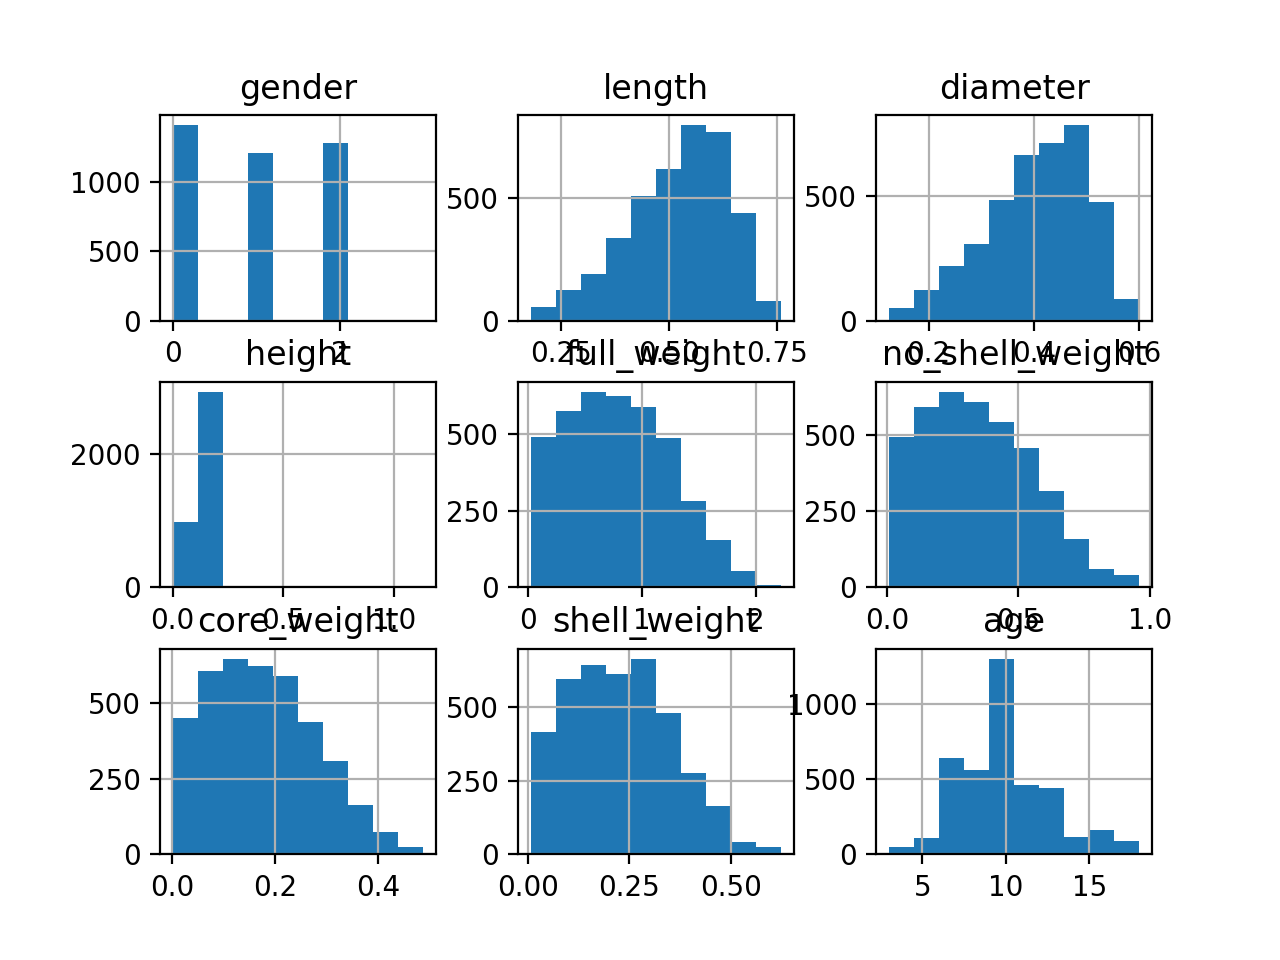

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'full_weight'}>,
        <Axes: title={'center': 'no_shell_weight'}>],
       [<Axes: title={'center': 'core_weight'}>,
        <Axes: title={'center': 'shell_weight'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

In [78]:
snails.hist()

We can see now that the distributions in the histograms for all nine columns looked more normalized, including `height`, `shell_weight`, and `age`. This data set should be ready for our model.

In [79]:
snails.to_csv('jose_vila_cleaned_assignment_6_data.csv')